# __1. Import Packages__

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# __2.Dataset Overview__

In [2]:
raw_data = pd.read_csv('Irisdataset.csv')

### __2.1 Top 5 Rows__

In [3]:
raw_data.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,Class
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
raw_data.drop(columns=['Unnamed: 0'], inplace=True)

### __2.2 Shape of the data__

In [5]:
raw_data.shape

(150, 5)

### __2.3 Dataset Basic Information:__

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### __2.4 Descriptions of Numerical Column:__

In [7]:
raw_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# __3. Data Preperation__

## __3.1 Copy the data__

In [8]:
data = raw_data.copy(deep=True)

## __3.2 Splitting the data into categroical and numerical columns__

In [9]:
numcols = data.select_dtypes(include=np.number).columns
objcols = data.select_dtypes(include='object').columns

# __4. Exploratory Data Analysis__

## __4.1 Missing values__

In [10]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Class           0
dtype: int64

##  __4.2 Duplicated Values__

In [11]:
data[data.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,Class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


## __4.3 Explore the Categorical Features__

In [12]:
data['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## __4.4 Find Categorical Feature Distribution__

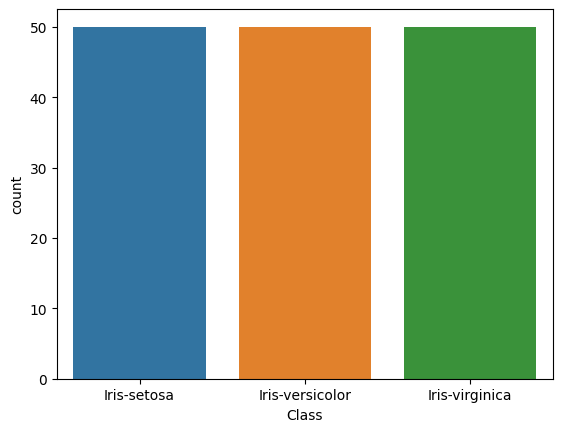

In [13]:
sns.countplot(data=data, x='Class')
plt.show()

## __4.5 Explore the Numerical Features__

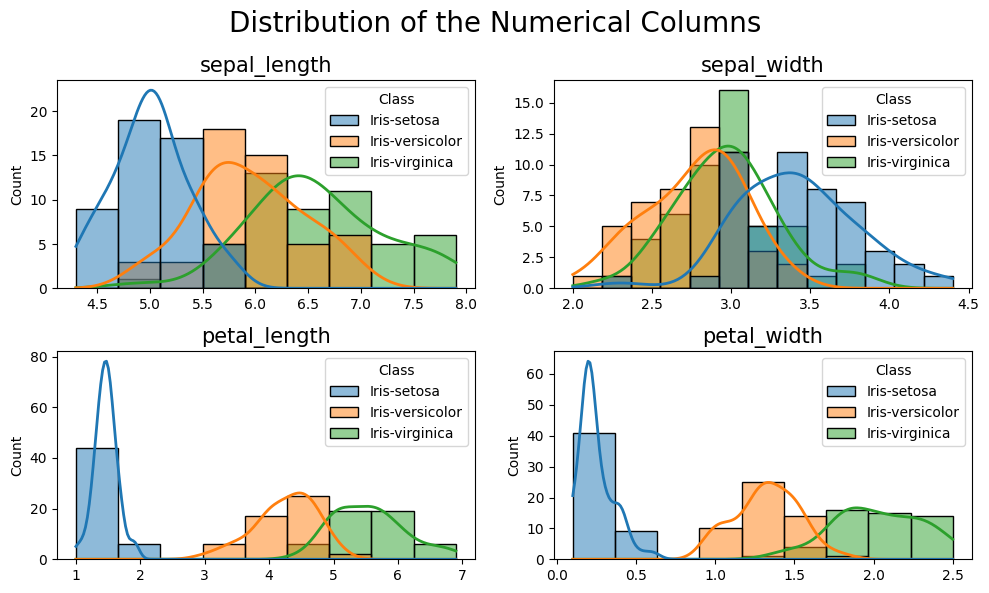

In [14]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,6))
axes = axes.flat
for index, column in enumerate(numcols):
    sns.histplot(
        data=data,
        x=column,
        stat='count',
        hue='Class',
        kde=True,
        line_kws={'linewidth':2},
        ax=axes[index]
    )
    axes[index].set_xlabel('')
    axes[index].set_title(column, size=15)
plt.suptitle('Distribution of the Numerical Columns', size=20)
plt.tight_layout()
plt.show()

In [15]:
data[data['Class']=='Iris-setosa']['petal_width'].kurtosis()

1.5664416078903205

## __4.6 Relation between Continuos numerical Features and Labels__

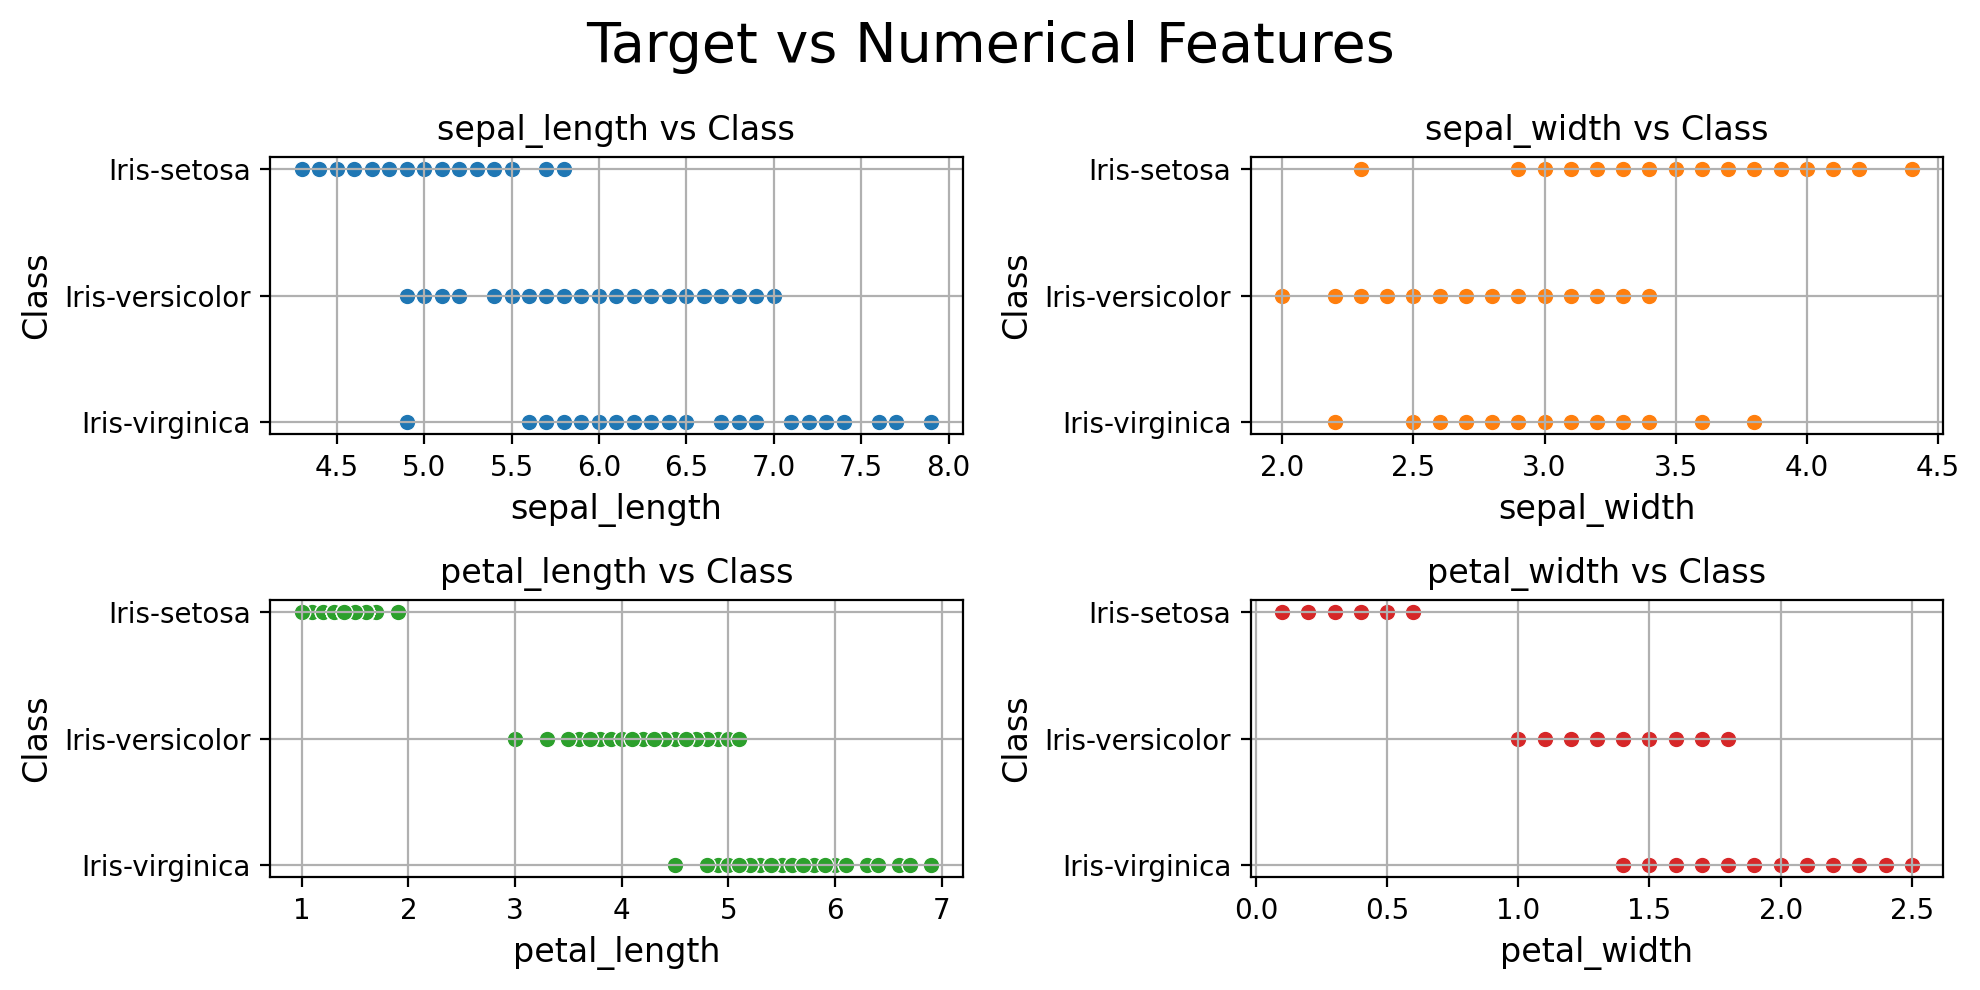

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,5), dpi=200)
axes =axes.flat
numfeatures = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'Class'
for index, column in enumerate(numfeatures):
    sns.scatterplot(
        data=data,
        x=column,
        y=target,
        linewidths=0.25,
        color=(list(plt.rcParams['axes.prop_cycle'])*2)[index]['color'],
        ax=axes[index]
)
    axes[index].set_title(f'{column} vs {target}', fontsize=12)
    axes[index].set_xlabel(column, size=12)
    axes[index].set_ylabel(target, size=12)
    axes[index].grid()

plt.suptitle('Target vs Numerical Features', size=20)
plt.tight_layout()

<Figure size 1500x800 with 0 Axes>

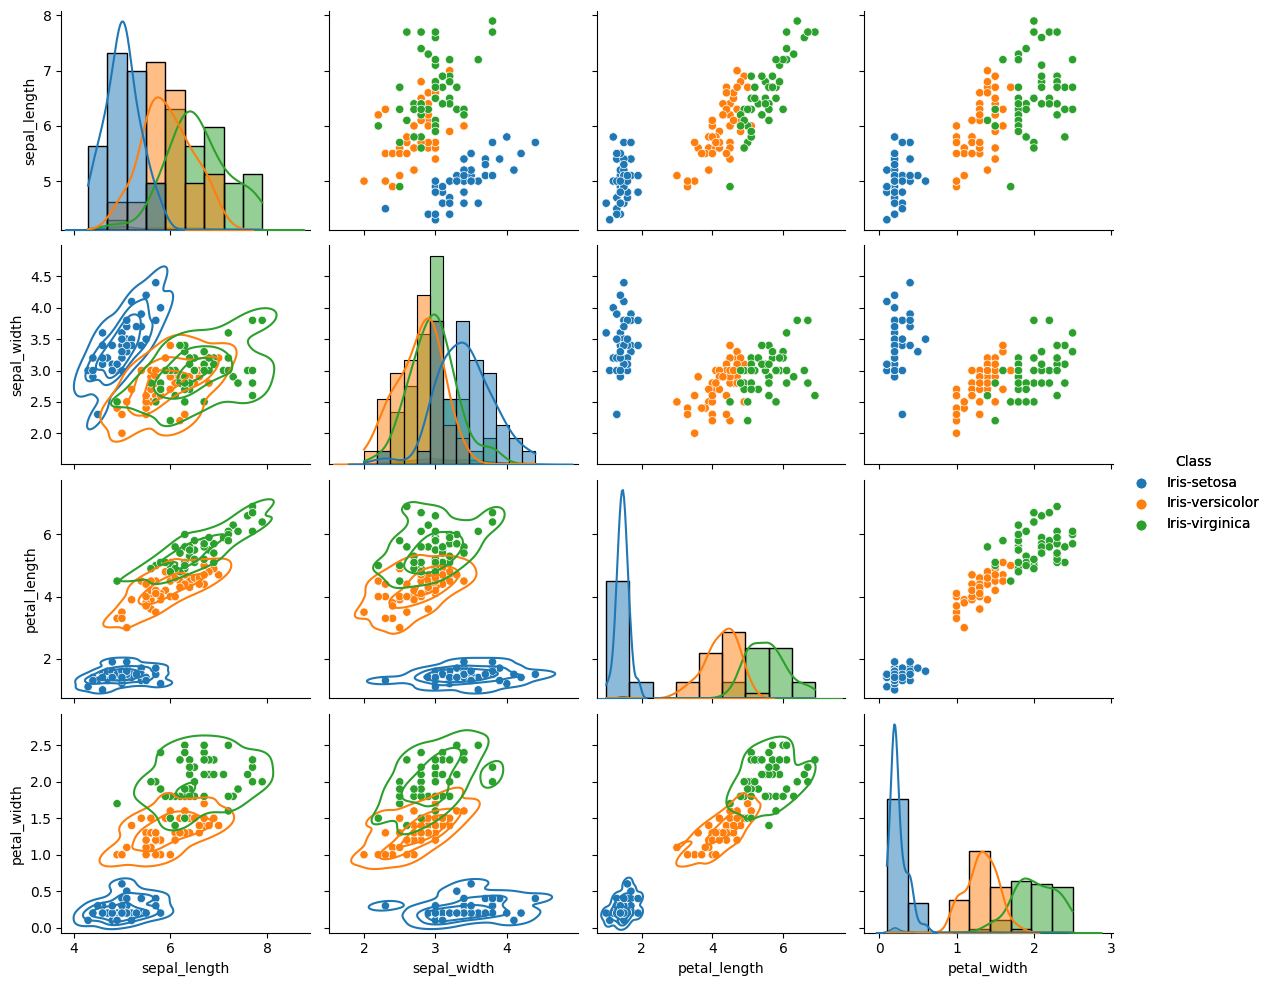

In [17]:
plt.figure(figsize=(15,8))
graph = sns.pairplot(data=data, hue="Class")
graph.map_upper(sns.scatterplot)
graph.map_lower(sns.kdeplot, levels=4, color=.2)
graph.map_diag(sns.histplot, kde=True)
graph.add_legend()

## __4.7 Finding outliers in the dataset__

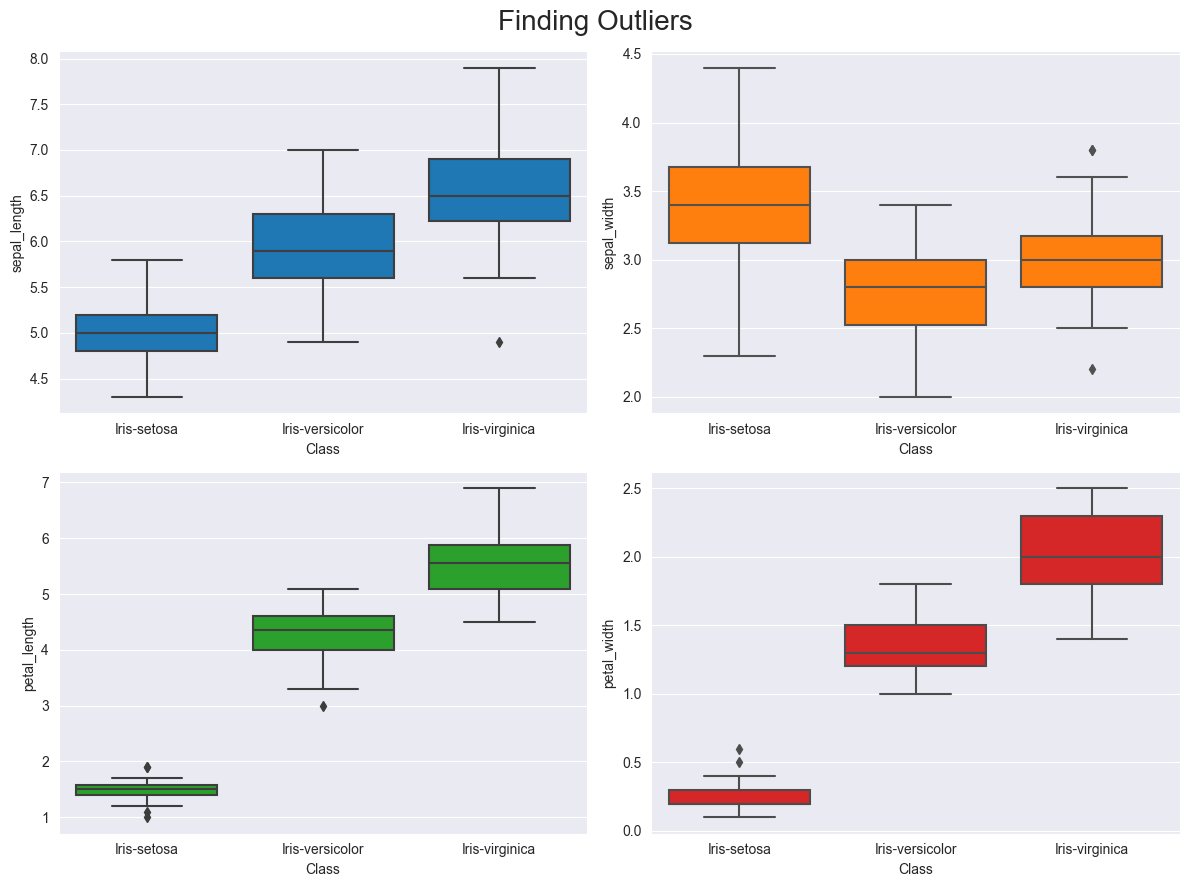

In [18]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12,9))
axes = axes.flat
for index, column in enumerate(numcols):
    sns.boxplot(
        data=data,
        y=column,
        x='Class',
        color=(list(plt.rcParams['axes.prop_cycle'])*2)[index]['color'],
        saturation=1,
        ax=axes[index]
        )
plt.suptitle('Finding Outliers', fontsize=20)
plt.tight_layout()

# __5. Feature Engineering__

## __5.1 Handling Categorical Features__

In [19]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data['Class'] = encode.fit_transform(data.Class.values)

## __5.2 Identifying the features__

In [21]:
data.corr().style.background_gradient('plasma')

,sepal_length,sepal_width,petal_length,petal_width,Class,sepal_ratio,petal_ratio
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561,0.728971,-0.563335
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446,-0.743521,0.320919
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043,0.836602,-0.684091
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464,0.751725,-0.734370
Class,0.782561,-0.419446,0.949043,0.956464,1.000000,0.776575,-0.663871
sepal_ratio,0.728971,-0.743521,0.836602,0.751725,0.776575,1.000000,-0.583908
petal_ratio,-0.563335,0.320919,-0.684091,-0.734370,-0.663871,-0.583908,1.000000


Text(0.5, 0.98, 'Correlation in heatmap')

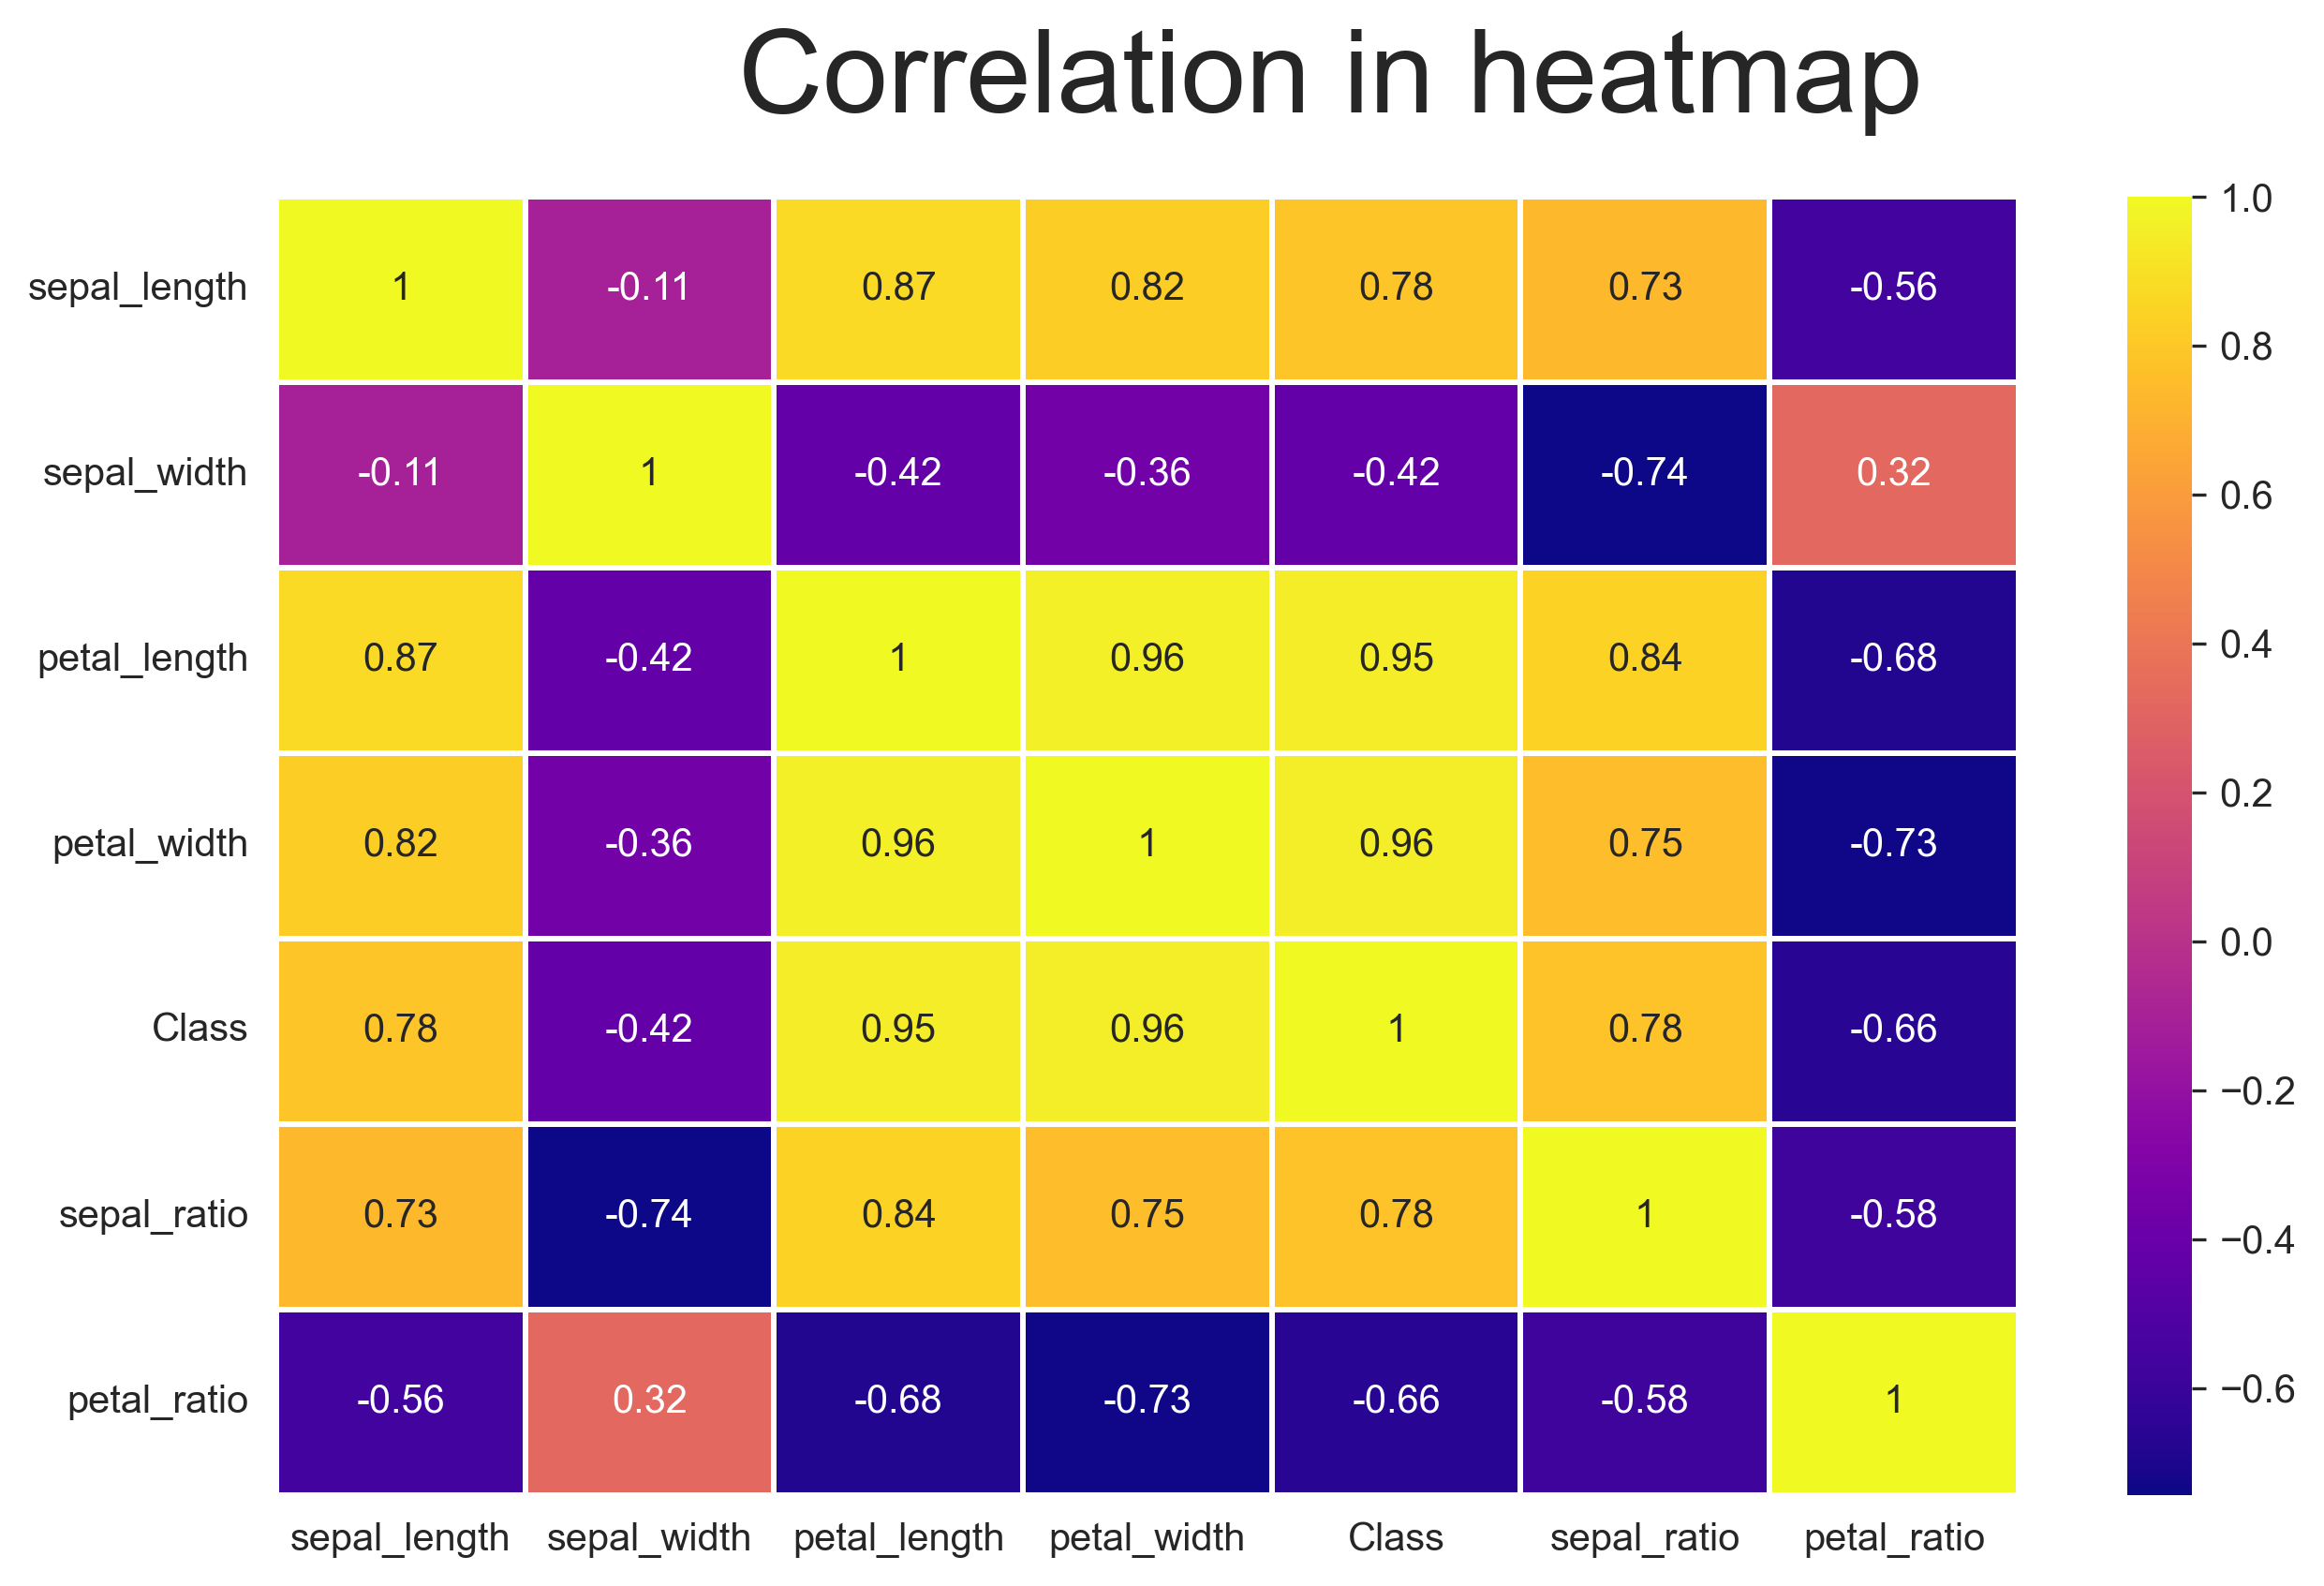

In [22]:
# Using heatmap to find correlation
plt.figure(figsize=(10,6), dpi=300)
sns.heatmap(
    data.corr(), 
    annot=True, 
    cmap='plasma', 
    linewidth=True
)
plt.suptitle('Correlation in heatmap', size=30)

## __5.3 Creating New Features__

In [ ]:
data['sepal_ratio'] = data['sepal_length'] / data['sepal_width']
data['petal_ratio'] = data['petal_length'] / data['petal_width']
data.corr()['Class']

sepal_length    0.782561
sepal_width    -0.419446
petal_length    0.949043
petal_width     0.956464
Class           1.000000
sepal_ratio     0.776575
petal_ratio    -0.663871
Name: Class, dtype: float64

In [23]:
# Select the features
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

## __5.4 Scaling the data__

In [24]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

# __6. Building a Model__

## __6.1 Determine Features & Target Variables__

In [25]:
X = X
y = data.Class

## __6.2 Split the dataset into Traing and Test sets__

In [26]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=2, train_size=0.30)

In [27]:
print('xtrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)
print('ytrain shape: ', ytrain.shape)
print('ytest shape: ',ytest.shape)

xtrain shape:  (45, 4)
xtest shape:  (105, 4)
ytrain shape:  (45,)
ytest shape:  (105,)


## __6.3 Train and Evaluate the Model__

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

svc = SVC()

# Create a grid search object
grid_search = GridSearchCV(svc, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(xtrain, ytrain)

# Re-create a SVC model with the best parameters
svc = SVC(**grid_search.best_params_)

# Fit the model to the training data
svc.fit(xtrain, ytrain)

# Predict the labels for the test data
y_pred = svc.predict(xtest)

#Checking Bias-variance tradeoff
train_accuracy = svc.score(xtrain, ytrain)
test_accuracy = svc.score(xtest, ytest)

#Converting Accuracy score into dataframe
dataframe = pd.DataFrame(
[train_accuracy*100, test_accuracy*100], 
index=['Train Accuracy', 'Test Accuracy'], 
columns=['Value'])
print(dataframe)

# Classification Report for the model
report = classification_report(ytest, y_pred)
print(report)

                    Value
Train Accuracy  95.555556
Test Accuracy   96.190476
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.97      0.94        31
           2       0.97      0.92      0.94        37

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105

